In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import sklearn
from sklearn.cluster import KMeans
from skimage.transform import rescale
from skimage import io
from yellowbrick.cluster import KElbowVisualizer
from PIL import Image as im
import os

In [10]:
image_path = "/content/drive/MyDrive/Colab Notebooks/dataset/dj_picture.jpg"
img = io.imread(image_path)
print(os.stat(image_path).st_size)

9967


In [3]:
def read_image(image_path):
  img = io.imread(image_path)
  print(img.shape)
  return img
def process_image(image_path):
  image_rescaled = read_image(image_path)
  image_rescaled = image_rescaled/255.0
  flatten_img = np.reshape(image_rescaled,(image_rescaled.shape[0] * image_rescaled.shape[1],image_rescaled.shape[2]))
  return flatten_img

In [4]:
distortionArray = np.zeros(16)

for k in range(1,16):
    elbowModel = KMeans(n_clusters=k)
    elbowModel.fit(process_image(image_path))
    distortionArray[k] = elbowModel.inertia_

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


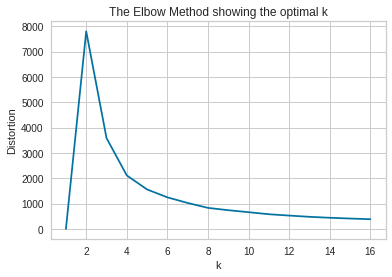

In [5]:
plt.plot(range(1,17), distortionArray, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show();

(200, 200, 3)


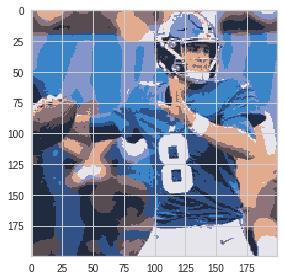

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


10268


In [9]:
img = process_image(image_path)
model = KMeans(n_clusters=8)
model.fit(img)
temp = model.cluster_centers_[model.labels_]
compressed_image = temp.reshape(200, 200, 3)
io.imshow(compressed_image)
io.show()
#compressed_image = im.fromarray(compressed_image.astype('uint8'))
io.imsave('compressed_image.png', compressed_image)
print(os.stat('compressed_image.png').st_size)

In [7]:
print(os.stat('compressed_image.png').st_size)

5825
